# 나랑 닮은 연예인을 찾아보자

## 1. 사진모으기

## 2. 얼굴영역 자르기

[(1469, 1362, 2428, 404)]


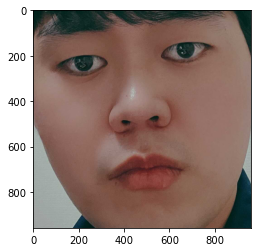

In [272]:
import face_recognition
import os

image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/my1.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations) 

%matplotlib inline
import matplotlib.pyplot as plt

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   

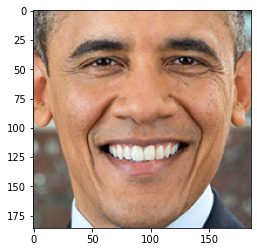

In [273]:
# get_gropped_face 함수 설정
import face_recognition
import os

def get_gropped_face(image_file):
        image = face_recognition.load_image_file(image_file)
        face_locations = face_recognition.face_locations(image)
        a, b, c, d = face_locations[0]
        cropped_face = image[a:c,d:b,:]
    
        return cropped_face
    
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/obama.jpg'

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

from PIL import Image
face = get_gropped_face(image_path)
pillow_image = Image.fromarray(face)
pillow_image.save(path_to_save)

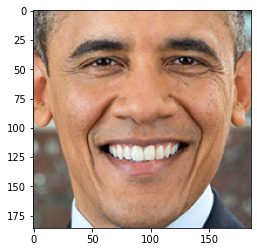

In [274]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/obama.jpg'

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

In [275]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['윤박.jpeg', '안우연.jpeg', '윤상현.jpeg', '이광기.jpeg', '김현중.jpeg', '이재백.jpeg', '이기영.jpeg', '윤태영.jpeg', '이상엽.jpeg', '이상인.jpeg', '육성재.jpeg', '이혁재.jpeg', '오창석.jpeg', '오광록.jpeg', '원기준.jpeg', '유오성.jpeg', '김진우.jpeg', '이태리.jpeg', '이정재.jpeg', '이준영.jpeg', '안보현.jpeg', '이상윤.jpeg', '연준석.jpeg', '김형민.jpeg', '이계인.jpeg', '이대근.jpeg', '유해진.jpeg', '이시강.jpeg', '윤기원.jpeg', '이영범.jpeg', 'my1.jpg', '임호.jpeg', '엄기준.jpeg', '오태경.jpeg', '김진수.jpeg', '이희도.jpeg', '김정현.jpeg', '이성민.jpeg', '엄태웅.jpeg', '이세진.jpeg', '윤현민.jpeg', '이수완.jpeg', '안재모.jpeg', '오정세.jpeg', '이재룡.jpeg', '이종수.jpeg', '이시언.jpeg', '이승기.jpeg', '김혜성.jpeg', '안세하.jpeg', '이준혁.jpeg', '이승형.jpeg', '임하룡.jpeg', '김정민.jpeg', '김정운.jpeg', '오재무.jpeg', '오만석.jpeg', 'bush.jpeg', '윤다훈.jpeg', 'obama.jpg', '유노윤호.jpeg', '윤희석.jpeg', '유동근.jpeg', '이순재.jpeg', '유민규.jpeg', '안재환.jpeg', '이정길.jpeg', '이세창.jpeg', '임형준.jpeg', '이준혁2.jpeg', '임채무.jpeg', '오의식.jpeg', '오대규.jpeg', '안도규.jpeg', '임현식.jpeg', '김호진.jpeg', '이재균.jpeg', '이태성.jpeg', '임원희.jpeg', '이규한.jpeg', '오상훈.jpeg', '이용주.jpeg', '이서

from PIL import Image
face = get_gropped_face(image_path)
pillow_image = Image.fromarray(face)
pillow_image.save(path_to_save)

## 3. 임베딩 영역 추출

In [276]:
image_file = os.path.join(dir_path, 'my1.jpg')
face = get_gropped_face(image_file)   # 얼굴 영역 구하는 함수

# 얼굴 임베딩 벡터 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.03366723,  0.06059422,  0.01875709, -0.05002877, -0.08980033,
        -0.06966934, -0.07305869, -0.09990728,  0.11289284, -0.1061615 ,
         0.16883428, -0.11954927, -0.25309774, -0.05838945, -0.06818755,
         0.20368671, -0.1339279 , -0.15314251, -0.0399515 ,  0.05342368,
         0.0982393 ,  0.00903954, -0.00510283,  0.05190784, -0.03805299,
        -0.30912632, -0.12174731, -0.05815789, -0.02324667, -0.05422965,
        -0.04592072,  0.06399632, -0.15968701, -0.05981812,  0.06691658,
         0.06916939, -0.01510398, -0.06784572,  0.17370503, -0.01157029,
        -0.2353783 ,  0.03744959,  0.04272157,  0.23748215,  0.13983279,
         0.06639176,  0.00994679, -0.21181935,  0.07791571, -0.19412835,
         0.07939621,  0.14072406,  0.09773705,  0.04520861,  0.02519035,
        -0.1489363 ,  0.08493967,  0.08739892, -0.15389241,  0.03107155,
         0.10458981, -0.031385  , -0.01651372, -0.10635499,  0.25868395,
         0.03680332, -0.11374427, -0.19167311,  0.1

In [277]:
# get_face_embedding_dict 함수 설정
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
           img_path = os.path.join(dir_path, file)
           face = get_gropped_face(img_path)
           embedding = get_face_embedding(face)
           if len(embedding) > 0:
                embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [278]:
embedding_dict = get_face_embedding_dict(dir_path)

In [279]:
# 이미지 간의 임베딩 거리 측정
import numpy as np
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('my1', '유민규')

0.3762401255694009

## 4. 모은 연예인들과 비교

In [280]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('my1')   

In [281]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('my1',
  array([-0.03366723,  0.06059422,  0.01875709, -0.05002877, -0.08980033,
         -0.06966934, -0.07305869, -0.09990728,  0.11289284, -0.1061615 ,
          0.16883428, -0.11954927, -0.25309774, -0.05838945, -0.06818755,
          0.20368671, -0.1339279 , -0.15314251, -0.0399515 ,  0.05342368,
          0.0982393 ,  0.00903954, -0.00510283,  0.05190784, -0.03805299,
         -0.30912632, -0.12174731, -0.05815789, -0.02324667, -0.05422965,
         -0.04592072,  0.06399632, -0.15968701, -0.05981812,  0.06691658,
          0.06916939, -0.01510398, -0.06784572,  0.17370503, -0.01157029,
         -0.2353783 ,  0.03744959,  0.04272157,  0.23748215,  0.13983279,
          0.06639176,  0.00994679, -0.21181935,  0.07791571, -0.19412835,
          0.07939621,  0.14072406,  0.09773705,  0.04520861,  0.02519035,
         -0.1489363 ,  0.08493967,  0.08739892, -0.15389241,  0.03107155,
          0.10458981, -0.031385  , -0.01651372, -0.10635499,  0.25868395,
          0.03680332, -0.1137

In [282]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :  
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [283]:
get_nearest_face('my1')

순위 1 : 이름(유민규), 거리(0.3762401255694009)
순위 2 : 이름(김현빈), 거리(0.3997587187910307)
순위 3 : 이름(오만석), 거리(0.3999406011225013)
순위 4 : 이름(이승형), 거리(0.40305394546578854)
순위 5 : 이름(이학주), 거리(0.4052753792956305)
